In [1]:
# Import Statements
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Hyperparameters
IMAGE_SIZE = (640, 400)
BATCH_SIZE = 8
EPOCHS = 20

Using TensorFlow backend.


In [2]:
# segmentation dataset
DATASET_DIR = '/home/naproxa/cs271proj/Semantic_Segmentation_Dataset' # replace with your path
TRAIN_IMAGE_DIR = DATASET_DIR + '/train/images'
TRAIN_LABELS_DIR = DATASET_DIR + '/train/labels'
VAL_IMAGE_DIR = DATASET_DIR + '/validation/images'
VAL_LABELS_DIR = DATASET_DIR + '/validation/labels'
TEST_IMAGE_DIR = DATASET_DIR + '/test/images'

print(len(os.listdir(TRAIN_IMAGE_DIR)))
print(len(os.listdir(VAL_IMAGE_DIR)))

8916
2403


In [3]:
assert (len(os.listdir(TRAIN_IMAGE_DIR)) == len(os.listdir(TRAIN_LABELS_DIR))) # 8916
np.set_printoptions(threshold=sys.maxsize)

images = sorted(os.listdir(TRAIN_IMAGE_DIR))
labels = sorted(os.listdir(TRAIN_LABELS_DIR))
print(len(images))

for i in range(len(images)):
    print(labels[i])
    label = np.load(TRAIN_LABELS_DIR+'/'+labels[i])
    print(label)
    print(label.shape)
    break

8916
000000002610.npy
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0

In [4]:
def load_data(IMAGE_DIR, LABEL_DIR):

    images = []
    image_list = sorted(os.listdir(IMAGE_DIR))
    if LABEL_DIR:
        labels = []
        label_list = sorted(os.listdir(LABEL_DIR))

    for file in tqdm(range(len(image_list))):

        image_path = IMAGE_DIR +'/'+image_list[i]
        
        # image is duplicated across channels, take 1st channel
        img = img_to_array(load_img(image_path), dtype=np.uint8)
        # img = img/np.amax(img)
        images.append(img[:, :, 0])
        
        if LABEL_DIR:
            label_path = LABEL_DIR +'/'+label_list[i]
            label = np.load(label_path)
            
            # only want "0s" and "1s" so zero-out "2s" and "3s"
            label[label > 1] = 0
            labels.append(label)

    if LABEL_DIR:
        images = np.array(images)
        labels = np.array(labels)
        images = images[:,:,:,np.newaxis]
        images = images.astype(np.float32)
        labels = labels[:,:,:,np.newaxis]
        labels = labels.astype(np.float32)
        return images, labels
    else:
        images = np.array(images)
        images = images[:,:,:,np.newaxis]
        images = images.astype(np.float32)
        return images

train_images, train_labels = load_data(TRAIN_IMAGE_DIR, TRAIN_LABELS_DIR)
val_images, val_labels = load_data(VAL_IMAGE_DIR, VAL_LABELS_DIR)
test_images = load_data(TEST_IMAGE_DIR, None)

print('Train images: ', train_images.shape)
print('Train labels: ', train_labels.shape)
print('Val images: ', val_images.shape)
print('Val labels: ', val_labels.shape)
print('Test images: ', test_images.shape)

100%|██████████| 1440/1440 [00:06<00:00, 238.59it/s]


Train images:  (8916, 640, 400, 1)
Train labels:  (8916, 640, 400, 1)
Val images:  (2403, 640, 400, 1)
Val labels:  (2403, 640, 400, 1)
Test images:  (1440, 640, 400, 1)


(640, 400, 1)


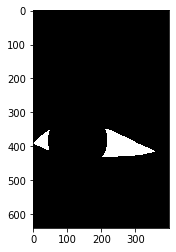

In [5]:
print(train_labels[0].shape)

plt.figure()
plt.imshow(train_labels[0,:,:,0].astype(np.uint8),cmap='gray')
plt.show()

(640, 400, 1)


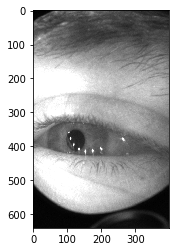

In [6]:
print(train_images[0].shape)

plt.figure()
plt.imshow(train_images[0,:,:,0].astype(np.uint8),cmap='gray')
plt.show()

In [7]:
print(train_images[0,:,:,0])

[[  1.   1.   4.   1.   4.   4.   1.   6.   4.   4.   4.   4.   4.   4.
    6.   4.   1.   4.   4.   1.   4.   4.   4.   4.   4.   4.   4.   1.
    4.   4.   4.   4.   4.   4.   6.   4.   6.   4.   4.   6.   4.   6.
    4.   6.   4.   9.   6.   6.   9.   6.   6.   9.   4.   6.   6.   9.
   10.  13.  15.  22.  31.  37.  54.  55.  63.  67.  73.  78.  87.  91.
   91.  94.  94. 103.  94. 109. 103. 108. 112.  99.  91.  90.  96.  94.
  100. 103.  99. 100.  99. 103.  99.  96.  94.  94.  90.  90.  94. 100.
  105.  99. 100. 103. 108. 109. 105. 103. 100.  99.  99. 103.  94.  94.
   87.  85.  82.  76.  73.  76.  76.  82.  87.  91.  87.  94.  96.  99.
  103. 103. 105. 114. 117. 117. 121. 123. 126. 112. 112. 114. 103. 100.
  105.  96.  90.  91.  94.  87.  99.  99. 108. 105. 114. 117. 118. 114.
  105. 103. 103. 100. 112. 109. 105. 105. 109. 108.  96.  94.  94.  99.
   96.  99. 103. 121. 114. 117. 121. 123. 118. 114. 123. 117. 121. 114.
  114. 114. 117. 117. 112. 118. 126. 118. 118. 126. 121. 121. 11

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(BATCH_SIZE)

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D, Dropout, concatenate

class U_Net(tf.keras.Model):

    def __init__(self):
        super(U_Net, self).__init__()
        # FILL IN CODE HERE #
        
        self.conv_left_1a = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_left_1b = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.pool_left_1 = MaxPool2D(pool_size=(2,2))
        self.conv_left_2a = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_left_2b = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.pool_left_2 = MaxPool2D(pool_size=(2,2))
        self.conv_left_3a = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_left_3b = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.pool_left_3 = MaxPool2D(pool_size=(2,2))
        self.conv_base_a = Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_base_b = Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.dropout = Dropout(rate=0.5)
        self.up_conv_right_1 = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_right_1a = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_right_1b = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.up_conv_right_2 = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_right_2a = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_right_2b = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.up_conv_right_3 = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_right_3a = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.conv_right_3b = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu', use_bias=True)
        self.output_layer = Conv2D(filters=1, kernel_size=(1,1), activation = 'sigmoid')
        
        # END CODE #

    def call(self, inputs):
        # FILL IN CODE HERE #
        
        a = self.conv_left_1a(inputs)
        b = self.conv_left_1b(a)
        c = self.pool_left_1(b)
        d = self.conv_left_2a(c)
        e = self.conv_left_2b(d)
        f = self.pool_left_2(e)
        g = self.conv_left_3a(f)
        h = self.conv_left_3b(g)
        i = self.pool_left_3(h)
        j = self.conv_base_a(i)
        k = self.conv_base_b(j)
        l = self.dropout(k)
        m = self.up_conv_right_1(UpSampling2D(size=(2, 2))(l))
        n = concatenate([h, m], axis = 3)
        o = self.conv_right_1a(n)
        p = self.conv_right_1b(o)
        q = self.up_conv_right_2(UpSampling2D(size=(2, 2))(p))
        r = concatenate([e, q], axis = 3)
        s = self.conv_right_2a(r)
        t = self.conv_right_2b(s)
        u = self.up_conv_right_3(UpSampling2D(size=(2, 2))(t))
        v = concatenate([b, u], axis = 3)
        w = self.conv_right_3a(v)
        x = self.conv_right_3b(w)
        output = self.output_layer(x)
        
        # END CODE #
        return output
        
model = U_Net()

In [10]:
lr = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train
hist = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset, verbose=2)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/20


ResourceExhaustedError:  OOM when allocating tensor with shape[8,128,640,400] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node Conv2DBackpropInput_2 (defined at /home/naproxa/miniconda3/envs/biods220-env2/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_2756]

Function call stack:
distributed_function


In [ ]:
plt.figure()
plt.plot(range(EPOCHS), hist.history['loss'], label='Training loss')
plt.plot(range(EPOCHS), hist.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()